# Milestone #2 - CSC 425  AI Project

## Sentiment Analysis - ChatGPT Reviews

Jade Bell

7 December 2025




## Sentiment Analysis

Natural Language Processing(NLP) refers to the way humans communicate with each other/use spoken or written words that have developed organically over time.

## Importing Libraries

In [ ]:
!pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 47.6 MB/s eta 0:00:00


In [ ]:
!pip install tensorflow

In [ ]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud
from nltk.corpus import stopwords
from gensim.models import Word2Vec
from textblob import TextBlob

from tensorflow.keras.preprocessing.text import Tokenizer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Load Dataset

In [ ]:
# Load the dataset
data = pd.read_csv('chatgpt_reviews.csv')

## Data Information

In [ ]:
# Check the first few rows of dataset
data.head()

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,98aa438d-0723-4128-a96c-0eed42e05120,Mr Raja,nice,5,0,1.2025.302,2025-11-08 11:44:16,1.2025.302
1,f7b09fb8-83ea-42ad-a90c-db12cf0ea528,Sri Subbu,this is my best friend,5,0,1.2025.302,2025-11-08 11:43:39,1.2025.302
2,5d2d7485-03d8-4e00-93c4-a84ffab6b9de,Seventh Use,The best ai ever use,5,0,1.2025.302,2025-11-08 11:43:30,1.2025.302
3,2e4551ca-c618-46ae-9f2e-05ef05cbefbe,Doll Shah,best,5,0,1.2025.302,2025-11-08 11:42:41,1.2025.302
4,6ee142a1-2cae-43a2-8d54-2e9dd5ce230a,Nihla Naseeha,Really surprised that it can prepare question ...,5,0,1.2025.302,2025-11-08 11:42:35,1.2025.302


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 866791 entries, 0 to 866790
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   reviewId              866791 non-null  object
 1   userName              866789 non-null  object
 2   content               866777 non-null  object
 3   score                 866791 non-null  int64 
 4   thumbsUpCount         866791 non-null  int64 
 5   reviewCreatedVersion  801649 non-null  object
 6   at                    866791 non-null  object
 7   appVersion            801649 non-null  object
dtypes: int64(2), object(6)
memory usage: 52.9+ MB


In [ ]:
data.shape

(866791, 8)

In [ ]:
print("Number of Total Entires : ", data.shape[0])
print("Number of Total Attributes : ", data.shape[1])

Number of Total Entires :  866791
Number of Total Attributes :  8


In [ ]:
data.describe()

,score,thumbsUpCount
count,866791.000000,866791.000000
mean,4.492502,0.141453
std,1.110157,7.798320
min,1.000000,0.000000
25%,5.000000,0.000000
50%,5.000000,0.000000
75%,5.000000,0.000000
max,5.000000,3460.000000


## Data Cleaning

We do not want Data & EDA to be distoreted with blank reviews and or duplicate entreis.

*   Check missing values
*   Remove nulls and duplicate values
*   Convert data types



In [ ]:
# Check for missing values
data.isnull().sum()

,0
reviewId,0
userName,2
content,14
score,0
thumbsUpCount,0
reviewCreatedVersion,65142
at,0
appVersion,65142


In [ ]:
# Handle Missing Values
data = data.dropna(subset=['userName', 'content'])

In [ ]:
# Removing Duplicates
data = data.drop_duplicates()

In [ ]:
# Remove Null Values
data = data.dropna()

In [ ]:
# Convert columns 'reviewCreatedVersion' and 'at' timestamp to datetime format
data['at'] = pd.to_datetime(data['at'])

data['reviewCreatedVersion'] = data['reviewCreatedVersion']. fillna('Unknown')

In [ ]:
# Show Revised data shape
print("Updated data shape:", data.shape)

Updated data shape: (799260, 8)


In [ ]:
# Recheck if there are missing values
data.isnull().sum()

,0
reviewId,0
userName,0
content,0
score,0
thumbsUpCount,0
reviewCreatedVersion,0
at,0
appVersion,0


##Exploring Dataset

**Exploratory Data Analysis (EDA)**

Explore dataset to find patterns and insights  of user reviews

/tmp/ipython-input-4077629758.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='score', data=data, palette='coolwarm')


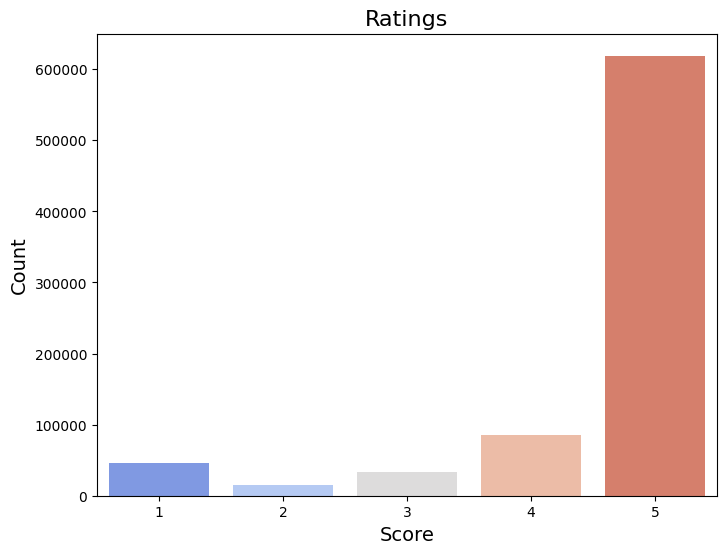

In [ ]:
# Show score distribution to understand the user rating trends
plt.figure(figsize=(8, 6))
sns.countplot(x='score', data=data, palette='coolwarm')
plt.title('Ratings', fontsize=16)
plt.xlabel('Score', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

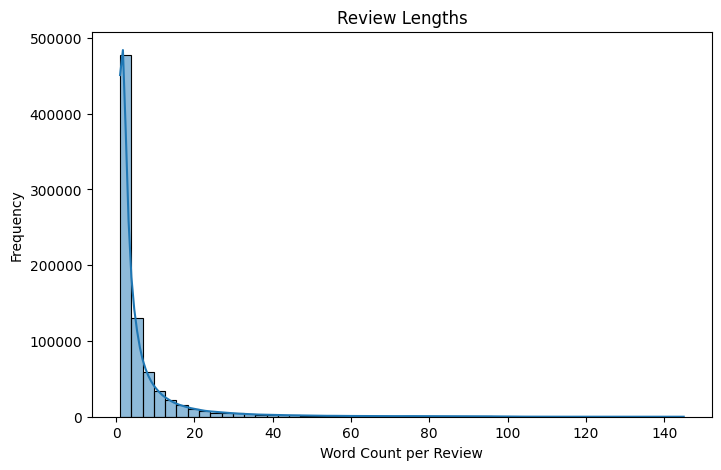

In [ ]:
data['review_length'] = data['content'].astype(str).apply(lambda x: len(x.split()))
plt.figure(figsize=(8,5))
sns.histplot(data['review_length'], bins=50, kde=True)
plt.title('Review Lengths')
plt.xlabel('Word Count per Review')
plt.ylabel('Frequency')
plt.show()

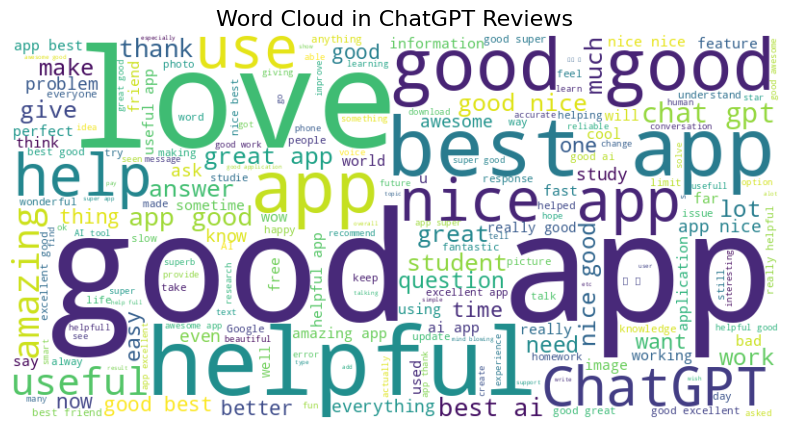

In [ ]:
# Check the most frequent words within the Google Play ChatGPT Review
text = " ".join(review for review in data['content'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud in ChatGPT Reviews', fontsize=16)
plt.show()

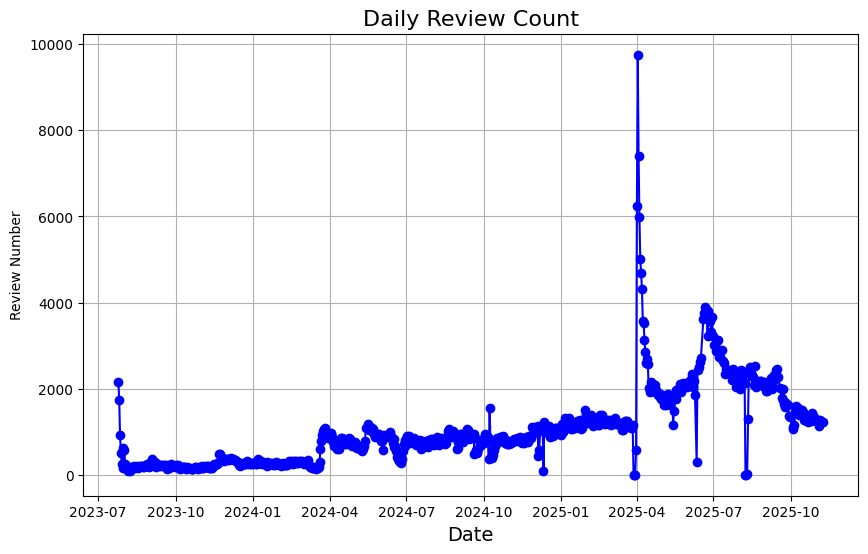

In [ ]:
# Since this dataset updates frequently,
# View the daily review count

# Extract review dates
data['review_date'] = data['at'].dt.date
daily_review = data.groupby('review_date').size()

# Plot Daily Review Count
plt.figure(figsize=(10,6))
daily_review.plot(kind='line', color='blue', marker='o')
plt.title('Daily Review Count',  fontsize=16)
plt.xlabel('Date',  fontsize=14)
plt.ylabel('Review Number')
plt.grid(True)

## Data Text Cleaning & Text Preprocessing

**Natural Processing Language(NLP)**

Before we model, we need to:

*   Convert Information in 'Content' to lowercase
*  Remove HTML/URLs
* Remove punctuation, stopwords
* Replace Emoji's
* Word Tokenization




In [ ]:
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.4/608.4 kB 20.5 MB/s eta 0:00:00


In [ ]:
import re
import string
import emoji

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [ ]:
# Download NLTK Data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
# Defining acronyms and abbreviations
acronyms = {
    "lol": "laughing out loud", "brb": "be right back", "btw": "by the way",
    "afk": "away from keyboard", "rofl": "rolling on the floor laughing",
    "ttyl": "talk to you later", "np": "no problem", "thx": "thanks",
    "omg": "oh my god", "idk": "i don't know", "wtf": "what the fuck",
    "pls": "please", "tbh": "to be honest", "u": "you", "r": "are",
    "y": "why", "tho": "though", "imho": "in my humble opinion",
    "jk": "just kidding", "luv": "love",  "2": "to", "4": "for",
    "b": "be", "wowww": "wow",
    "c": "see","h8": "hate"
}

In [ ]:
def text_preprocessor(text):
  # Make text lowercase
  text = str(text).lower()
  # Convert emojis into text
  text = emoji.demojize(text, delimiters=(" ", " "))
  # Remove URLs
  text = re.sub(r'http\S+|www\S+', ' ', text)
  # Remove HTML Tags
  text = re.sub(r'<.*?>', ' ', text)
  # Remove mentions (@, and hashtags)
  text = re.sub(r"\@\w+|\#", "", text)
  # Remove punctuation/special chars
  text = re.sub(r'[^a-z\s]', ' ', text)
  # Remove extra white spaces
  text = re.sub(r"\s+", " ", text).strip()

  #Expand acronyms into text
  words = text.split()
  words= [acronyms[word] if word in acronyms else word for word in words]
  text = " ".join(words)
  return text

data['text_processor'] = data['content'].apply(text_preprocessor)
data['text_processor']



,text_processor
0,nice
1,this is my best friend
2,the best ai ever use
3,best
4,really surprised that it can prepare question ...
...,...
863263,spider web
863264,red heart red heart red heart red heart red he...
863265,red heart red heart red heart
863266,red heart red heart red heart


In [ ]:
# Tokenization, Removing Stopwords, and Lemmatization
def processed_txt(text):
  tokens = word_tokenize(text)
  # Tokenize and remove stopwords
  tokens = [word for word in tokens if word not in stop_words]
  tokens = [lemmatizer.lemmatize(word) for word in tokens]
  return " ".join(tokens)

data['processed_txt'] = data['text_processor'].apply(text_preprocessor)




In [ ]:
data[['content',  'text_processor', 'processed_txt']].head(50)

,content,text_processor,processed_txt
0,nice,nice,nice
1,this is my best friend,this is my best friend,this is my best friend
2,The best ai ever use,the best ai ever use,the best ai ever use
3,best,best,best
4,Really surprised that it can prepare question ...,really surprised that it can prepare question ...,really surprised that it can prepare question ...
5,amazing app,amazing app,amazing app
6,wowwwwww,wo,wo
7,muy buena,muy buena,muy buena
8,good 😊,good smiling face with smiling eyes,good smiling face with smiling eyes
9,best app,best app,best app


## Feature Engineering(FE)

### Feature Engineering - The process of creating new textual data into features.

It is the process of creating or modifying features that machine models can understand. this additonal step is important for preparing dataset for machine learning models that can improve its performance.

This will also help classifiers perform better and gain deeper insight on dataset

*  Sentiment Analysis - For each review, will derive sentiments(positive, neutral, negative)  from sentiment score to help understand each review emotions/mood.
*date fetaures (week, month, tear from the review date)


In [ ]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
sia = SentimentIntensityAnalyzer()
# Sentiment Analysis
data['sentiment_score'] = data['text_processor'].apply(lambda x: sia.polarity_scores(str(x))['compound'])

# Verbosity of word usign a word counter
data['word_count'] = data['text_processor'].apply(lambda x: len(str(x).split()))

# Number of characters
data['char_count'] = data['text_processor'].apply(lambda x: len(str(x)))

# Word Length to calculate its average
data['word_length_avg'] = data['char_count'] / data['word_count']

# Date Features
data['review_date'] = pd.to_datetime(data['review_date'])
data['day_of_week'] = data['review_date'].dt.dayofweek
data['week_of_year'] = data['review_date'].dt.isocalendar().week
data['month'] = data['review_date'].dt.month
data['year'] = data['review_date'].dt.year

In [ ]:
# Create column for sentiment labels
def classify_sentiment(score):
  if score > 0.75:
    return 'Positive'
  elif score < 0.25:
    return 'Negative'
  else:
    return 'Neutral'


data['sentiment_label'] = data['sentiment_score'].apply(classify_sentiment)

# Check distribution of the new labels
print(data['sentiment_label'].value_counts())

sentiment_label
Neutral     515414
Negative    172792
Positive    111054
Name: count, dtype: int64


In [ ]:
# Sentiment Distribution Percentages
sentiment_counts = data['sentiment_label'].value_counts()
sentiment_percentages = sentiment_counts / len(data) * 100
print(sentiment_percentages)


sentiment_label
Neutral     64.486400
Negative    21.618998
Positive    13.894603
Name: count, dtype: float64


In [ ]:
# Drop any empty/NAN content
positive_review = data[data['sentiment_label'] == 'Positive']['content'].dropna()
negative_review = data[data['sentiment_label'] == 'Negative']['content'].dropna()
neutral_review = data[data['sentiment_label'] == 'Neutral']['content'].dropna()

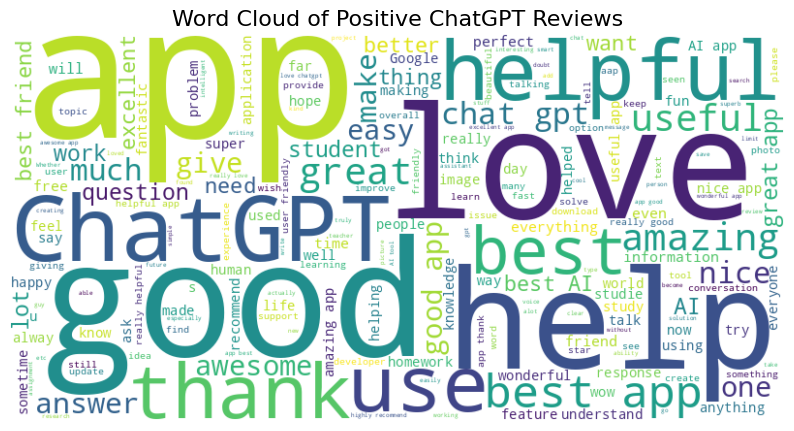

In [ ]:
# POSITIVE REVIEW WORDCLOUD
text = " ".join(positive_review)

if text:
  wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

  plt.figure(figsize=(10, 6))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.title('Word Cloud of Positive ChatGPT Reviews', fontsize=16)
  plt.show()
else:
  print("No positive content to generate.")


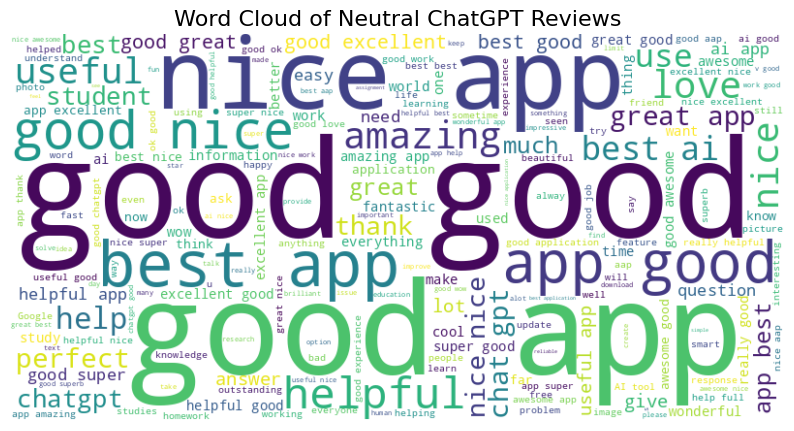

In [ ]:
# NEUTRAL REVIEW WORDCLOUD
text = " ".join(neutral_review)

if text:
  wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

  plt.figure(figsize=(10, 6))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.title('Word Cloud of Neutral ChatGPT Reviews', fontsize=16)
  plt.show()
else:
  print("No neutral content to generate.")

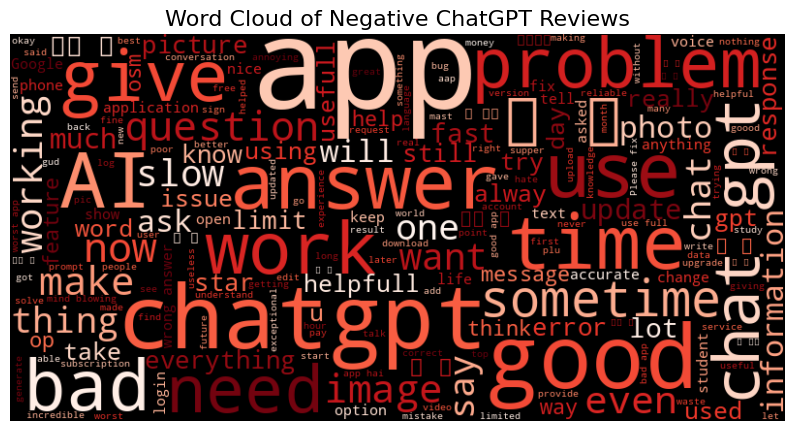

In [ ]:
# NEGATIVE REVIEW WORDCLOUD
text = " ".join(negative_review)

if text:
  wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(text)

  plt.figure(figsize=(10, 6))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.title('Word Cloud of Negative ChatGPT Reviews', fontsize=16)
  plt.show()
else:
  print("No negative content to generate.")

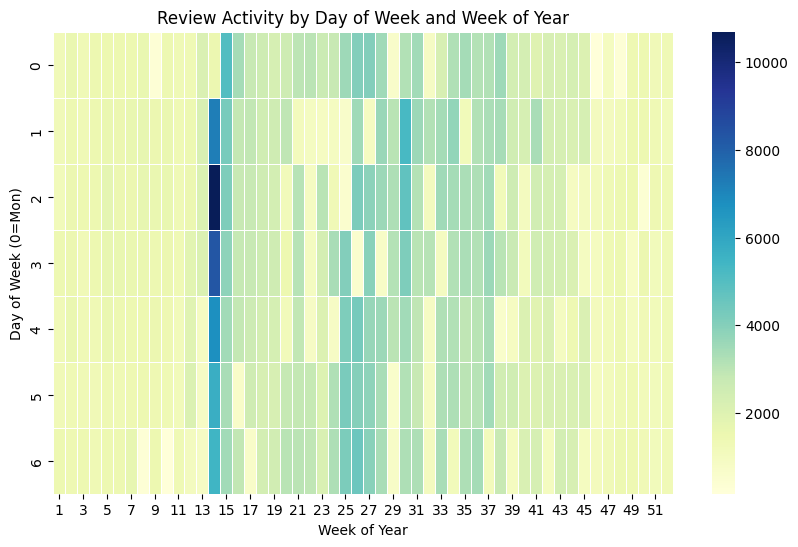

In [ ]:
pivot = data.pivot_table(index='day_of_week', columns='week_of_year', aggfunc='size', fill_value=0)

plt.figure(figsize=(10, 6))
sns.heatmap(pivot, cmap='YlGnBu', linewidths=0.5)
plt.title('Review Activity by Day of Week and Week of Year')
plt.xlabel('Week of Year')
plt.ylabel('Day of Week (0=Mon)')
plt.show()

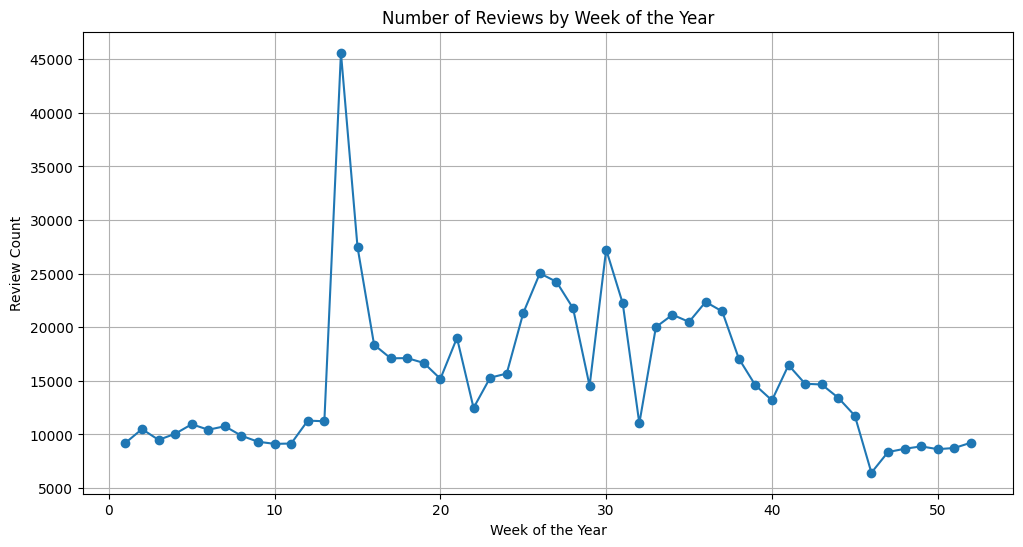

In [ ]:
# Weekly trend plot
weekly_count = data.groupby('week_of_year').size()
plt.figure(figsize=(12, 6))
plt.plot(weekly_count.index, weekly_count.values, marker='o')
plt.title('Number of Reviews by Week of the Year')
plt.xlabel('Week of the Year')
plt.ylabel('Review Count')
plt.grid(True)
plt.show()

In [ ]:
data

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion,review_length,review_date,...,processed_txt,sentiment_score,word_count,char_count,word_length_avg,day_of_week,week_of_year,month,year,sentiment_label
0,98aa438d-0723-4128-a96c-0eed42e05120,Mr Raja,nice,5,0,1.2025.302,2025-11-08 11:44:16,1.2025.302,1,2025-11-08,...,nice,0.4215,1,4,4.000000,5,45,11,2025,Neutral
1,f7b09fb8-83ea-42ad-a90c-db12cf0ea528,Sri Subbu,this is my best friend,5,0,1.2025.302,2025-11-08 11:43:39,1.2025.302,5,2025-11-08,...,this is my best friend,0.8126,5,22,4.400000,5,45,11,2025,Positive
2,5d2d7485-03d8-4e00-93c4-a84ffab6b9de,Seventh Use,The best ai ever use,5,0,1.2025.302,2025-11-08 11:43:30,1.2025.302,5,2025-11-08,...,the best ai ever use,0.6369,5,20,4.000000,5,45,11,2025,Neutral
3,2e4551ca-c618-46ae-9f2e-05ef05cbefbe,Doll Shah,best,5,0,1.2025.302,2025-11-08 11:42:41,1.2025.302,1,2025-11-08,...,best,0.6369,1,4,4.000000,5,45,11,2025,Neutral
4,6ee142a1-2cae-43a2-8d54-2e9dd5ce230a,Nihla Naseeha,Really surprised that it can prepare question ...,5,0,1.2025.302,2025-11-08 11:42:35,1.2025.302,12,2025-11-08,...,really surprised that it can prepare question ...,0.5709,16,91,5.687500,5,45,11,2025,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
863263,cabeabce-0819-44ae-ba73-e37f570f8ba0,Pragnesh Dobariya,🕸️,5,0,1.0.0016,2023-07-25 15:25:07,1.0.0016,1,2023-07-25,...,spider web,0.0000,2,10,5.000000,1,30,7,2023,Negative
863264,af435485-55cf-45ce-973f-a8474ce2add4,Prince shakya,❤️❤️❤️❤️❤️❤️❤️,5,0,1.0.0016,2023-07-25 15:10:51,1.0.0016,1,2023-07-25,...,red heart red heart red heart red heart red he...,0.0000,14,69,4.928571,1,30,7,2023,Negative
863265,1eff641a-fc9e-4364-98e3-0b9786a7c872,emdadul rayhan,❤️❤️❤️,5,0,1.0.0016,2023-07-25 15:11:13,1.0.0016,1,2023-07-25,...,red heart red heart red heart,0.0000,6,29,4.833333,1,30,7,2023,Negative
863266,4e691e40-30d3-47d7-815c-4271b6f19fee,Mahdir Mahim,❤️❤️❤️,5,0,1.0.0016,2023-07-25 18:10:27,1.0.0016,1,2023-07-25,...,red heart red heart red heart,0.0000,6,29,4.833333,1,30,7,2023,Negative


## Model Training

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder= LabelEncoder()
data['sentiment_encoded'] = label_encoder.fit_transform(data['sentiment_label'])

In [ ]:
print("Label Mapping:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

Label Mapping: {'Negative': np.int64(0), 'Neutral': np.int64(1), 'Positive': np.int64(2)}


## train-test splitting


In [ ]:
X = data['processed_txt']
y = data['sentiment_encoded']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(639408,) (159852,) (639408,) (159852,)


### Feature Extraction

Feature Extraction using TF IDF.

$$\text{tf-idf}(t,d)=\text{tf (t,d)}\times \text{idf}(t,d)$$



In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2),stop_words='english')

In [ ]:
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

In [ ]:
X_train_tfidf.shape

(639408, 5000)

In [ ]:
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [ ]:
X_test_tfidf.shape

(159852, 5000)

## Model Evaluation

In [ ]:
# Naive Bayes  Model
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
y_pred_nb = nb_model.predict(X_test_tfidf)

In [ ]:
print("Naive Bayes Model Evaluation")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))

Naive Bayes Model Evaluation
Accuracy: 0.794584991116783

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.60      0.67     34464
           1       0.81      0.92      0.86    103327
           2       0.76      0.53      0.62     22061

    accuracy                           0.79    159852
   macro avg       0.77      0.68      0.72    159852
weighted avg       0.79      0.79      0.79    159852



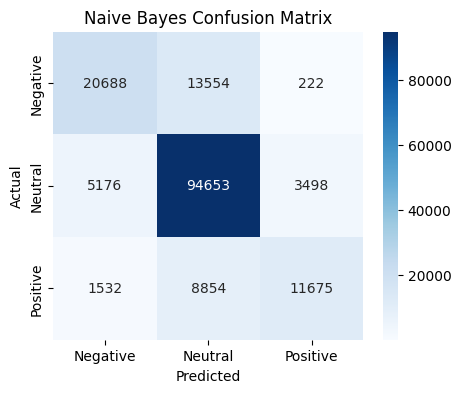

In [ ]:
# Naive Bayes Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(
    confusion_matrix(y_test, y_pred_nb),
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=label_encoder.classes_,
    yticklabels=label_encoder.classes_
)
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# Cross Validation
nb_cv = cross_val_score(nb_model, tfidf_vectorizer.transform(X), y, cv=5)
print("Cross-Validation Accuracy (Naive Bayes):", nb_cv.mean())

Cross-Validation Accuracy (Naive Bayes): 0.7941170582789081


In [ ]:
dt_model = DecisionTreeClassifier(
    random_state=42,
    max_depth=20,        # limit tree depth
    min_samples_split=10, # don’t split tiny nodes
    min_samples_leaf=5
)
dt_model.fit(X_train_tfidf, y_train)
y_pred_dt = dt_model.predict(X_test_tfidf)

In [ ]:
print(" Decision Tree Model Evaluation")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt, target_names=label_encoder.classes_))

 Decision Tree Model Evaluation
Accuracy: 0.8331519155218577

Classification Report:
               precision    recall  f1-score   support

    Negative       0.66      0.93      0.77     34464
     Neutral       0.92      0.84      0.88    103327
    Positive       0.87      0.64      0.74     22061

    accuracy                           0.83    159852
   macro avg       0.81      0.80      0.79    159852
weighted avg       0.85      0.83      0.84    159852



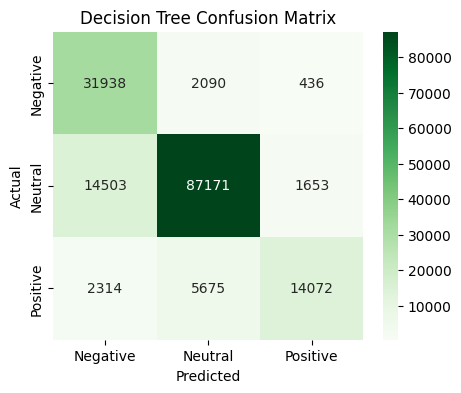

In [ ]:
plt.figure(figsize=(5,4))
sns.heatmap(
    confusion_matrix(y_test, y_pred_dt),
    annot=True,
    fmt='d',
    cmap='Greens',
    xticklabels=label_encoder.classes_,
    yticklabels=label_encoder.classes_
)
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
dt_cv = cross_val_score(dt_model, tfidf_vectorizer.transform(X), y, cv=5)
print("Cross-Validation Accuracy (Decision Tree):", dt_cv.mean())

Cross-Validation Accuracy (Decision Tree): 0.8336886620123615


In [ ]:
# Gradient Booster

gb_model = GradientBoostingClassifier(
    n_estimators=100,        # default is 100, can lower to 50 for even faster runs
    learning_rate=0.1,       # controls contribution of each tree
    max_depth=3,             # shallow trees = faster + less overfitting
    subsample=0.8,           # use 80% of samples for each tree (stochastic boosting)
    random_state=42
)
gb_model.fit(X_train_tfidf, y_train)
y_pred_gb = gb_model.predict(X_test_tfidf)

In [ ]:
print(" Gradient Boosting Model Evaluation")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_gb, target_names=label_encoder.classes_))

 Gradient Boosting Model Evaluation
Accuracy: 0.8595638465580662

Classification Report:
               precision    recall  f1-score   support

    Negative       0.77      0.92      0.84     34464
     Neutral       0.90      0.90      0.90    103327
    Positive       0.83      0.60      0.69     22061

    accuracy                           0.86    159852
   macro avg       0.83      0.80      0.81    159852
weighted avg       0.86      0.86      0.86    159852



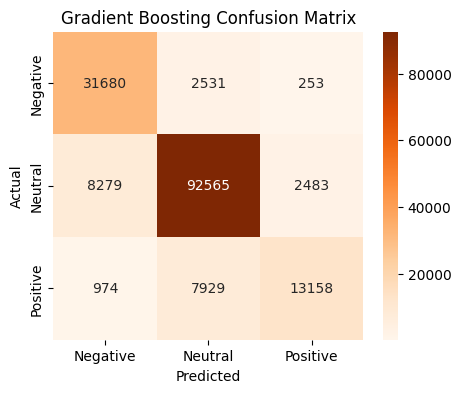

In [ ]:
plt.figure(figsize=(5,4))
sns.heatmap(
    confusion_matrix(y_test, y_pred_gb),
    annot=True,
    fmt='d',
    cmap='Oranges',
    xticklabels=label_encoder.classes_,
    yticklabels=label_encoder.classes_
)
plt.title('Gradient Boosting Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
gb_cv = cross_val_score(gb_model, tfidf_vectorizer.transform(X), y, cv=3)
print("Cross-Validation Accuracy (Gradient Boosting):", gb_cv.mean())

KeyboardInterrupt: 

## Done!